In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt 
import warnings 
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

2024-10-04 23:36:04.418608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 23:36:04.593836: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 23:36:04.598948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 23:36:04.841318: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-04 23:36:12.259519: W tensorflow/compiler/tf2

In [2]:
X, y = make_circles(n_samples=100, noise=0.1,random_state=1)

In [3]:
sns.scatterplot(X[:,0],X[:,1], hue=1)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)


In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [7]:
history=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=3500,
                 verbose=0)

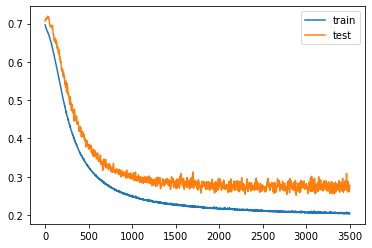

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 ━━━━━━━━━━━━━━━━━━━━ 4s 961us/step


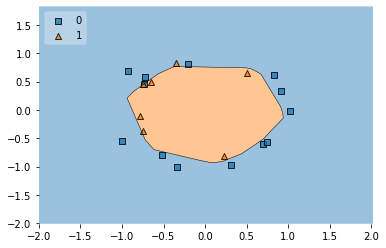

In [10]:
plot_decision_regions(X_test, y_test.ravel(), clf=model,
                    legend=2)
plt.show()

Early Stopping

In [11]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [16]:
callback= EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4563 - loss: 0.6927 - val_accuracy: 0.3500 - val_loss: 0.6951
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5148 - loss: 0.6919 - val_accuracy: 0.3500 - val_loss: 0.6956
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5836 - loss: 0.6879 - val_accuracy: 0.3500 - val_loss: 0.6973
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5383 - loss: 0.6882 - val_accuracy: 0.3500 - val_loss: 0.6971
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5383 - loss: 0.6877 - val_accuracy: 0.3000 - val_loss: 0.6983
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5602 - loss: 0.6858 - val_accuracy: 0.3000 - val_loss: 0.7007
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5211 - loss: 0.6902 - val_accuracy: 0.3000 - val_loss: 0.7024
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5664 - loss: 0.6879 - val_accuracy: 0.3000 - v

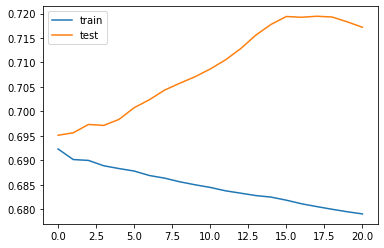

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 ━━━━━━━━━━━━━━━━━━━━ 4s 892us/step


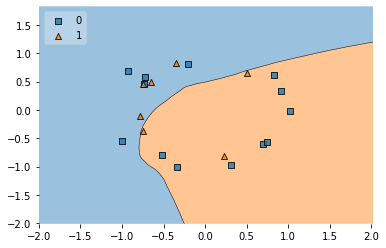

In [19]:
plot_decision_regions(X_test, y_test.ravel(), clf=model,
                     legend=2)
plt.show()